### RNN study

2023 0409 0028i...
I feel a little sick
lets get init

In [30]:
##Hardware
import torch
if torch.cuda.is_available() == True:
    device = 'cuda'
    templist = [1,2,3]
    templist = torch.FloatTensor(templist).to(device)
    print("Cuda torch working : ",end="")
    print(templist.is_cuda)
    print("current device no. : ",end="")
    print(torch.cuda.current_device())
    print("GPU device count : ",end="")
    print(torch.cuda.device_count())
    print("GPU name : ",end="")
    print(torch.cuda.get_device_name(0))
    print("device : ",device)
    ! nvidia-smi
elif torch.backends.mps.is_available() == True:
    print("Apple device detected\nActivating Apple Silicon GPU")
    device = torch.device("mps")
else:
    print("cant use gpu , activating cpu")
    device = 'cpu'

Apple device detected
Activating Apple Silicon GPU


In [31]:
import torch
import torch.nn as nn
import numpy as np

Data

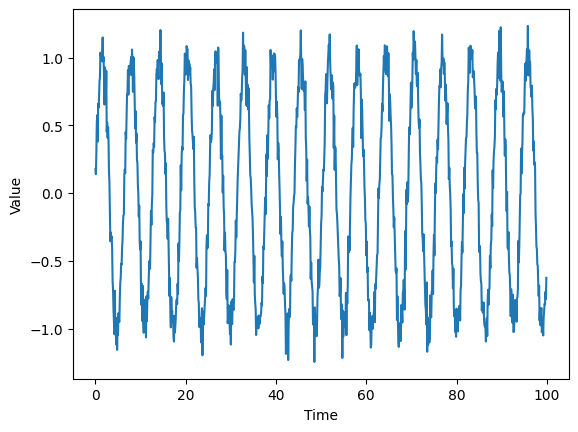

In [32]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# 시계열 데이터 생성
t = np.arange(0, 100, 0.1)
x = np.sin(t) + 0.1 * np.random.randn(t.shape[0])

plt.plot(t, x)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


In [33]:
sequence_length = 10 # it means 10 input and 1 output
input_data = []
target_data = []

for i in range(len(x) - sequence_length):
    input_seq = x[i:i + sequence_length]## input 1 ~ 10 target : 11 // input : 2~11 target : 12
    target_seq = x[i + sequence_length]
    input_data.append(input_seq)
    target_data.append(target_seq)
    
input_data_tensor = torch.tensor(input_data, dtype=torch.float32).unsqueeze(-1)
# 2dim data
target_data_tensor = torch.tensor(target_data, dtype=torch.float32).unsqueeze(-1)
#1 dim data

In [34]:
len(x)

1000

In [35]:
##MODEL
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, ouput_size):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size,hidden_size,batch_first = True)
        self.fc = nn.Linear(hidden_size,ouput_size)

    def forward(self,x):
        out,_ = self.rnn(x)
        out = self.fc(out[:,-1,:])
        return out

In [36]:
## SET
input_size  = 1
hidden_size = 32
output_size = 1
learning_rate = 0.01
num_epochs = 100

model = RNN(input_size,hidden_size,ouput_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


In [37]:
# Save the initial model weights
best_loss = float("inf")
best_model_weights = model.state_dict()


for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(input_data_tensor)
    loss = criterion(output,target_data_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1 ) % 10 == 0:
        print(f"Epoch : {epoch + 1}, Loss :  {loss.item()}")
        
    if loss.item() < best_loss:
        best_loss = loss.item()
        best_model_weights = model.state_dict()# I didnt put break, since it could flux


##if you dont want to save in your pc
"""
best_model = RNN(input_size, hidden_size, ouput_size)
best_model.load_state_dict(best_weights)
"""

# Save the best model weights to a file
torch.save(best_model_weights, "best_model_weights.pt")

# Load the best model weights from the file
best_model_weights = torch.load("best_model_weights.pt")

# Create a new model with the same architecture
best_model = RNN(input_size, hidden_size, output_size)

# Load the best model weights into the new model
best_model.load_state_dict(best_model_weights)




Epoch : 10, Loss :  0.09042315185070038
Epoch : 20, Loss :  0.031444285064935684
Epoch : 30, Loss :  0.020380357280373573
Epoch : 40, Loss :  0.02046162076294422
Epoch : 50, Loss :  0.018105512484908104
Epoch : 60, Loss :  0.016590172424912453
Epoch : 70, Loss :  0.01580645516514778
Epoch : 80, Loss :  0.015353883616626263
Epoch : 90, Loss :  0.015020042657852173
Epoch : 100, Loss :  0.014774380251765251


<All keys matched successfully>